# Regresión Softmax.

## Introducción

```{index} Softmax regresión, regresión logística multinomial
```

En el apartado [dedicado a la regresión logística](logistica) ha quedado bien claro una importante limitación del ajuste mediante regresión logística, pues el mismo queda limitado a los casos en que la variable dependiente o target sólo puede tomar dos posibles valores.

En este apartado, vamos a generalizar esa situación para el caso de que la variable dependiente sea cualitativa pero con más de dos categorías, como pudiera ser la clasificación en tres formas distintas de sentimiento ( positivo, negativo o neutro ), en cuyo caso se contará con un total de tres categorías. Para resolver este tipo de problemas, se cuenta con la herramienta denominada **regresión softmax**, o también regresión logística multinomial.

Así pues, para este tipo de regresión, la variable objetivo tiene un valor que varía sobre un conjunto de más de dos clases, entonces por analogía a la regresión logit [vista en el apartado](logistica), el objetivo va a ser calcular la probabilidad de que la variable dependiente y pertenezca a una de las clases potenciales, para una observación dada, es decir se tratará de calcular $P(y=c|x)$.

Como vamos a poder observar este método de regresión generaliza el uso de la función sigmoidea que ya hemos visto [en el apartado de regresión logística](logistica), y para ello lo que se va a utilizar es la denominada función softmax que gracias a ella se podrá calcular la $P(y=c|x)$. Esta función se define para un vector de n valores reales $z=(z_{1},z_{2},...,z_{n})^T$, de la siguiente manera:

$$ s(z{_i})=\frac{e^{z_{i}}}{\sum_{j=1}^{n}e^{z_{j}}},\ 1\le i\le n$$

Como puede verse cada valor que devuelve esta función está entre cero y uno y además la suma de todos los valores que devuelve es siempre igual a uno. El vector de valores que devuelve esta función es el siguiente:

$$ s(z) = \left[\frac{e^{z_{1}}}{\sum_{j=1}^{n}e^{z_{j}}}, \frac{e^{z_{2}}}{\sum_{j=1}^{n}e^{z_{j}}}, ...., \frac{e^{z_{n}}}{\sum_{j=1}^{n}e^{z_{j}}}\right]$$.

Los valores de esta función se pueden obtener fácilmente en python, mediante el uso de la librería scipy, veamos a continuación cómo: 

In [ ]:
import numpy as np
from scipy.special import softmax

In [ ]:
z = np.array([2, 1.4, -4,5, 5.2, 2.3, 0.5,1.6])
print("El valor de la función softmax para el vector anterior es:")
softmax(z)
print("\nComprobamos que su suma es 1")
print(np.sum(softmax(z)))

Entonces teniendo en cuenta todas estas propiedades, y de forma similar a como se montó la función sigmoidea, se podría construir la función softmax, considerando un vector de pesos $w = (w{_0},w{_1},...,w{_n})$  y un vector de valores observados $x = (1,x{_1},x{_2},...,x{_n})$, y entonces se definiría.

$$P(y=c|x)=\frac{e^{w_{c}^{t}x}}{\sum_{j=1}^{n}e^{w_{j}^{t}z}}$$

Notar que para cada valor que pueda tomar la variable dependiente se tienen n parámetros a estimar diferentes, por lo que si son k los valores que que puede tomar la variable dependiente y. Si además  tenemos n variables independientes, entonces el número total de parámetros a estimar por el modelo sería $k\cdot(n+1)$.

De esta manera para cada valor x que se quiera clasificar, se signara a la clase en la que se obtenga una mayor probabilidad, dentro el vector de probabilidades que devuelve softmax. 

Como en todos los problemas de optimización, necesitamos además definir un función de pérdida que será la que se minimice para poder así estimar los parámetros del modelo. Para este problema, la función de pérdida que se utiliza es la denominada función de pérdida de **entropía cruzada**, que se define de la siguiente manera:

$$En(\hat{y},y)=-\sum_{h=1}^{k}I_{\{y=h\}}log\hat{P}(y=h|x)=-\sum_{h=1}^{k}I_{\{y=h\}}log\frac{e^{w_{k}^{t}x}}{\sum_{j=1}^{n}e^{w_{j}^{t}z}} $$

Donde la expresión $I_{\{y=h\}}$ toma un valor de 1 cuando la variable dependiente es igual a h y cero en caso contrario (es decir es la función indicador).

Veamos un poco el significado de esta función de coste, que recordemos que de lo que se trata es de buscar los parámetros que la minimizan. Cuando la variable y toma el valor h, se trata de maximizar la probabilidad de que y tomo ese valor, pero como el valor máximo es 1, lo función logaritmo toma el valor cero en ese punto ( recordar log(1) = 0 ), y por lo tanto si la probabilidad llegara a valer 1 ( que sería lo óptimo) entonces la entropia cruzada total valdría cero, luego estaríamos minimizando esa función al actuar de esta manera. 

Aunque no se demostrará aquí ( el lector interesado puede ver esto con más detalle [en este enlace](http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/)) por quedar fuera del alcance de este curso, se puede demostrar que el gradiente para una muestra es la diferencia entre el valor de la clase verdadera k y la probabilidad que el clasificador genera para la clase k ponderado por el valor de la entrada $x_k$, es decir:

$$\frac{\partial En(\hat{y},y)}{\partial w_{k}}=-\left(I_{\{y=k\}}-P(y=k|x)\right)x_{k}=-\left(I_{\{y=k\}}-\frac{e^{w_{k}^{t}x}}{\sum_{j=1}^{n}e^{w_{j}^{t}z}}\right)x_{k}$$

La función softmax, tiene una importancia muy elevada en el mundo de las redes neuronales, cuando se quiere resolver algún tipo de problemas de clasificación, ya que en estos casos, Softmax se implementa a través de una capa de red neuronal justo antes de la capa de salida. La capa Softmax debe tener el mismo número de nodos que la capa de salida. Este esquema lo podemos ver en la siguiente figura:

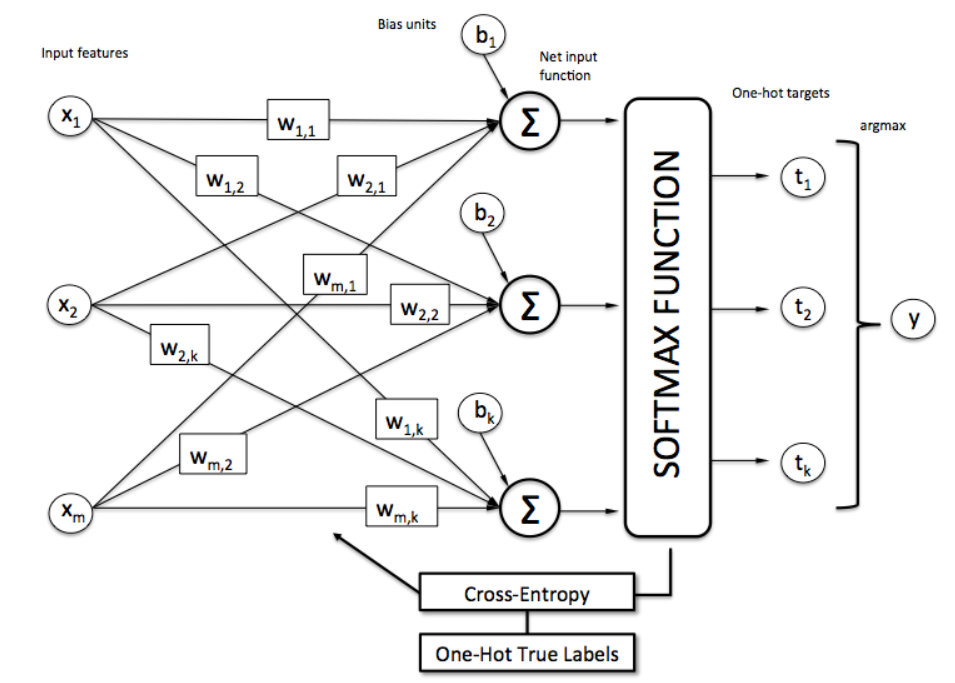

Para resolver de manera práctica estos problemas, también se utiliza la clase *[Logistidregression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)* de Scikip Learn, pero en este caso debemos utilizar el parámetro *multi_class = "multinomial"*. Veamos a continuación un ejemplo práctico.

El primer ejemplo que se va a exponer es en base a una serie de datos creados con la función  *make_classification()* que se suele utilizar para generar un determinado número de filas y columnas con determinado número de clases. A continuación se muestra cómo trabajar con esta función.

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
# definimos el conjunto de datos
X, y = make_classification(n_samples=2000, n_features=10, n_informative=5, 
                           n_redundant=5, n_classes=3, random_state=1)
# resumen del dataset
print(X.shape, y.shape)
print(Counter(y))

In [ ]:
# definimos el modelo de regresión ligística
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

Es una buena práctica evaluar los modelos de clasificación utilizando una validación cruzada de [tipo k-fold estratificada repetida ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html) . La estratificación garantiza que cada grupo (fold) de validación cruzada tenga aproximadamente la misma distribución de elementos de cada clase que el conjunto de datos de entrenamiento completo.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

# definimos el modelo de evaluación comenado
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# procedemos a evaluar el modelo
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# Sacamos el dato el ajuste obtenido
print('Acuracidad media: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Otro ejemplo de aplicar este clasificador puede verse mediante la utilización del fichero winequality-red.csv, que se puede localizar en [uci](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/). Se trata de un conjunto de datos que contiene diversas variables sobre un determinado tipo de vino, y además la variable "quality" que indica la calidad del vino y será la que utilizaremos en este ejemplo como variable dependiente.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv("data/winequality-red.csv")
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Veamos cuantos valores distintos hay de calidad del vino
datos.quality.unique()

Vamos a definir tres tipos de categorías sobre las que hacer la inferencia. Para ello, la categoria 1 agrupa los valores 3,4 y 5 de quality; la categoria 2 se corresponde con el valor 6 de quality y la categria 3 para el resto de valores.

In [ ]:
for index, row in datos.iterrows():
    if row['quality'] in [3,4,5]:
        datos.loc[index,'categoria'] =  1
    elif row['quality'] == 6:
        datos.loc[index,'categoria'] = 2
    else:
        datos.loc[index, 'categoria'] = 3
        
datos.categoria.value_counts()

In [ ]:
from sklearn.linear_model import LogisticRegression

Procedemos ahora a realizar el ajuste mediante softmax, para ello seleccionamos las primeras 11 variable como features, y como variable dependiente la creada anteriormente

In [ ]:
X = datos[datos.columns[0:11]].values
y = datos['categoria'].values

from sklearn.preprocessing import StandardScaler
# estandarizamos los datps
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

In [ ]:
regresion = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
regresion.fit(Xstan,y)

In [ ]:
# Veamos los coeficientes estimados
regresion.intercept_,regresion.coef_

In [ ]:
# calculemos los valores predichos
yhat = regresion.predict(Xstan)

In [ ]:
# sacamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y,yhat)

## Otros clasificadores múltiples.

Hay otra serie de clasificadores que resuelven el problema de la clasificación, pero existen dos métodos que basándose en clasificadores de dos variantes, como es el caso del la regresión logística, permiten también resolver problemas de clasificación múltiple. Estas dos variantes son las siguiente:

1.- One-vs-Rest.[Ver aquí](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html)

2.- One-vs-One. [ver aquí](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html)

Los dos los podemos [ver en este enlace](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/).